In [ ]:
# uncomment the bottom line to install the package
# !pip install TCalc==1.1.1

Importing classes from the `tcalc` module

In [1]:
from TCalc.tcalc import eyepiece, telescope, barlow_lens, focal_reducer

To quickly access the docstring, run `help(classname)`

In [2]:
help(eyepiece)

Help on class eyepiece in module TCalc.tcalc:

class eyepiece(builtins.object)
 |  eyepiece(f_e, fov_e=50)
 |  
 |  Class representing a single eyepiece
 |  Args:
 |      f_e: focal length of the eyepiece (mm) 
 |      fov_e: field of view of the eyepiece (deg). Defaults to 50 degrees.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, f_e, fov_e=50)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



For an example, let's try to have estimate the specifications of Celestron's 8 SE telescope.

In [3]:
c8 = telescope(D_o=203.2, f_o=2032, user_D_eye=None, user_age=22) # adding configuration of 8in scope
omni_40 = eyepiece(40, 52) # defining 40 mm eyepiece
omni_25 = eyepiece(25, 52) # defining 25 mm eyepiece

Focal Ratio:'10.0'
True Focal Ratio:'10.0'


In [5]:
# adding eyepiece to the telescope
c8.add_eyepiece(omni_40, id='omni_40', select=True)
c8.add_eyepiece(omni_25, id='omni_25', select=True)

In [6]:
# listing all the added eyepieces in a table format
c8.list_eyepiece()


   Currently included eyepieces:
     Name           Focal Length   FOV
     -------------- -------------- --------------
     'omni_40'      40 mm          52 degrees     
     'omni_25'      25 mm          52 degrees     

   The currently selected eyepiece is 'omni_25'


   Additional optical parts available:
     Name           Type           Power
     -------------- -------------- --------------

   No optical part is selected



In [7]:
# listing overall configuration of the telescope
c8.say_configuration() # remember this with 25 mm eyepiece


   The telescope has the following layout:
      Aperture diameter: 203.2 mm
      Focal length: 2032 mm, corresponding to a focal ratio of 10.0

   In good atmospheric conditions, the resolution of the telescope (Dawes limit) is 0.6 arcseconds
   By wavelength, the resolution is
      400 nm (blue): 0.5 arcsec
      550 nm (green): 0.7 arcsec
      700 nm (red): 0.9 arcsec

   The maximum possible magnification factor is 406.4
   This means the minimum compatible eyepiece focal length is 5.0 mm

   The minimum magnification factor and corresponding maximum eyepiece focal length depend on the diameter of the observer's eye.
   For a telescope user with an eye diameter of 7 mm (apropriate for an age around 25 years):
      The minimum magnification factor is 29.0
      This means the maximum compatible eyepiece focal length is 406.4 mm

   The faintest star that can be seen by this telescope is 13.5 mag

   The currently selected eyepiece is 'omni_25', which has the following layout:
 

In [8]:
# selecting different eyepiece
c8.select_eyepiece('omni_40')
c8.say_configuration()


   The telescope has the following layout:
      Aperture diameter: 203.2 mm
      Focal length: 2032 mm, corresponding to a focal ratio of 10.0

   In good atmospheric conditions, the resolution of the telescope (Dawes limit) is 0.6 arcseconds
   By wavelength, the resolution is
      400 nm (blue): 0.5 arcsec
      550 nm (green): 0.7 arcsec
      700 nm (red): 0.9 arcsec

   The maximum possible magnification factor is 406.4
   This means the minimum compatible eyepiece focal length is 5.0 mm

   The minimum magnification factor and corresponding maximum eyepiece focal length depend on the diameter of the observer's eye.
   For a telescope user with an eye diameter of 7 mm (apropriate for an age around 25 years):
      The minimum magnification factor is 29.0
      This means the maximum compatible eyepiece focal length is 406.4 mm

   The faintest star that can be seen by this telescope is 13.5 mag

   The currently selected eyepiece is 'omni_40', which has the following layout:
 

In [9]:
# calling individual functions
c8._compute_focal_ratio()

Focal Ratio:'10.0'
True Focal Ratio:'10.0'


In [10]:
# adding additional optical parts
reducer = focal_reducer(.5) # defining focal reducer of 0.5x
barlow = barlow_lens(2)     # defining barlow lens of 2x 

In [11]:
c8.add_optic(reducer,'reducer 1', select=True) # adding reducer to the telescope
c8.add_optic(barlow,'barlow 1', select=False)    # adding barlow to the telescope

#if the magnifications limits get reached then warning will be printed. 

Focal Ratio:'5.0'
True Focal Ratio:'10.0'
Note: The magnification produced by this eyepiece is not compatible with the telescope.


In [12]:
c8.add_optic(reducer,'reducer 1', select=False) 
c8.add_optic(barlow,'barlow 1', select=True)    

Focal Ratio:'20.0'
True Focal Ratio:'10.0'


In [13]:
# printing configuration again with barlow lens
c8.say_configuration()


   The telescope has the following layout:
      Aperture diameter: 203.2 mm
      Focal length: 2032 mm, corresponding to a focal ratio of 10.0
   'barlow 1', a Barlow lens, has been added to the optical path. This increases the focal length by 2
   This results in
      Focal length: 4064 mm, corresponding to a focal ratio of 20.0

   In good atmospheric conditions, the resolution of the telescope (Dawes limit) is 0.6 arcseconds
   By wavelength, the resolution is
      400 nm (blue): 0.5 arcsec
      550 nm (green): 0.7 arcsec
      700 nm (red): 0.9 arcsec

   The maximum possible magnification factor is 406.4
   This means the minimum compatible eyepiece focal length is 10.0 mm

   The minimum magnification factor and corresponding maximum eyepiece focal length depend on the diameter of the observer's eye.
   For a telescope user with an eye diameter of 7 mm (apropriate for an age around 25 years):
      The minimum magnification factor is 29.0
      This means the maximum compat

You can notice that if used a *2x barlow lens* on a *40mm eyepiece*, the brightness of the object will be decresead by **4 times!**

This way you can simulate different scenarios and find out which accesories are optimal for your purpose. This will save you both time and money on costly accesories! 

For advanced users, the plot functionality provides the plots of `resolution performance`, `maginfication_limits` and `eyepiece_limits`.

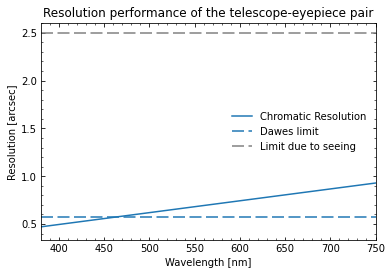

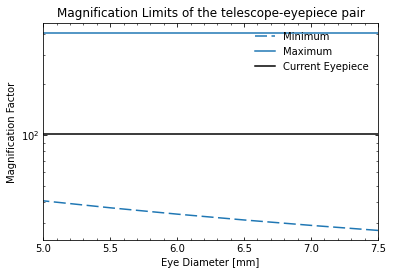

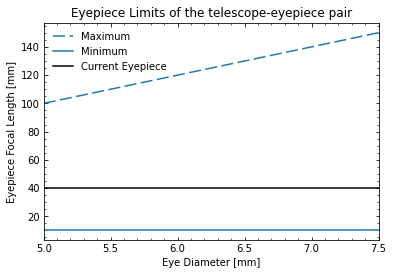

In [14]:
c8.show_resolving_power()
c8.show_magnification_limits()
c8.show_eyepiece_limits()